<h1 align="center">Report on Final Project</h1>
<h4 align="center">Korepanova Natalia</h4>
<h5 align="center">Moscow, 2015</h5>

### Data
**Challenges in Representation Learning: Facial Expression Recognition Challenge, Kaggle, 
Fri 12 Apr 2013 – Fri 24 May 2013** https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

* 48x48 pixel grayscale images of faces (about 300 mb).
* The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image.
* The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
* 28709 train examples, two train sets - each of them contains 3589 entries.
* Accuracy is used for evaluation.

### Spark experiments

**Naive Bayes** attempts were not successful. Accuraccy on the test and train set was about 0.25.

**Logistic regression with LBFGS optimizer with different parameters** were tried (uncluding pre-transformation with PCA). Finally, the best score on the whole test set was optained when

* the number of iterations is limited by 500
* L2 regularization parameter is 0.1
* intercept is fitted
* image colors was inversed (255 - pixel_value)
* the data was standardized along each pixel
* the model is trained against 0 class

*Train accuracy: 0.3994, Test accuracy: 0.3845*

Class|Precision|Recall
-|-|-|-
0|0.2720|0.0741
1|0.0|0.0
2|0.2796|0.1474
3|0.4601|0.6741
4|0.3148|0.3416
5|0.4191|0.5523
6|0.3436|0.3706

* Weighted precision: 0.3521
* Weighted recall: 0.3845
* Weighted F1 score: 0.3516

**Decision Tree and Ensembles** were tried but all attempts were resulted in memory error!

### Theanets experiments

In [1]:
import theanets as tn
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

/home/natalia/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [2]:
df = pd.read_csv("./fer2013/fer2013.csv")
pixels = df["pixels"]
df = df.drop("pixels", axis=1)

All images are scaled to [0, 1].

In [3]:
X = np.zeros((df.shape[0], 48*48), dtype=float)
for i in range(df.shape[0]):
    X[i, :] = [float(x)  for x in pixels.iloc[i].split(" ")]
    xmin = np.amin(X[i, :])
    xmax = np.amax(X[i, :])
    if xmax-xmin != 0:
        X[i, :] = (X[i, :] - xmin)*(1 - 0)/(xmax - xmin) + 0
    else:
        X[i, :] = 1
del pixels
Xdf = pd.DataFrame(X)
del X
df = pd.concat([df, Xdf], axis=1)
del Xdf

In [4]:
traindf = df[df['Usage'] == 'Training'].drop('Usage', axis=1)
testdf = df[df['Usage'] != 'Training'].drop('Usage', axis=1)
del df
print(traindf.shape, testdf.shape)

(28709, 2305) (7178, 2305)


In [5]:
train = traindf.drop("emotion", axis=1).as_matrix().astype('f'), traindf['emotion'].as_matrix().astype('i')
test = testdf.drop("emotion", axis=1).as_matrix().astype('f'), testdf['emotion'].as_matrix().astype('i')
del traindf
del testdf

Emotion:  0 angry


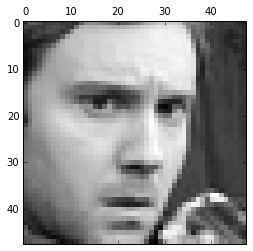

In [12]:
idx = train[1] == 0
plt.matshow(train[0][idx][0, :].reshape(48, 48), cmap=plt.cm.gray)
print("Emotion: ", 0, "angry")

Emotion:  1 disgust


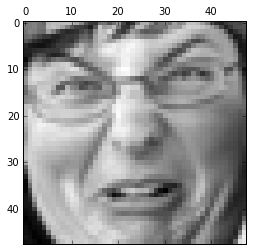

In [13]:
idx = train[1] == 1
plt.matshow(train[0][idx][0, :].reshape(48, 48), cmap=plt.cm.gray)
print("Emotion: ", 1, "disgust")

Emotion:  2 fear


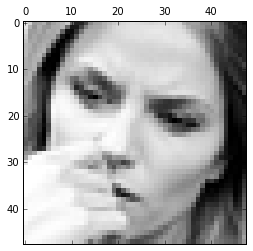

In [14]:
idx = train[1] == 2
plt.matshow(train[0][idx][0, :].reshape(48, 48), cmap=plt.cm.gray)
print("Emotion: ", 2, "fear")

Emotion:  3 happy


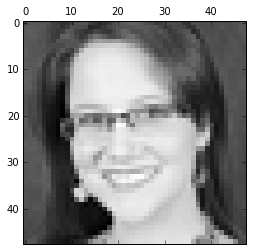

In [15]:
idx = train[1] == 3
plt.matshow(train[0][idx][0, :].reshape(48, 48), cmap=plt.cm.gray)
print("Emotion: ", 3, "happy")

Emotion:  4 sad


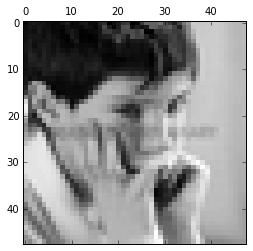

In [16]:
idx = train[1] == 4
plt.matshow(train[0][idx][0, :].reshape(48, 48), cmap=plt.cm.gray)
print("Emotion: ", 4, "sad")

Emotion:  5 suprise


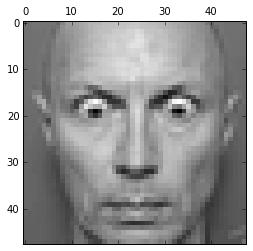

In [17]:
idx = train[1] == 5
plt.matshow(train[0][idx][0, :].reshape(48, 48), cmap=plt.cm.gray)
print("Emotion: ", 5, "suprise")

Emotion:  6 neutral


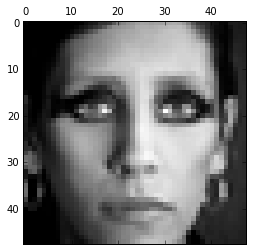

In [18]:
idx = train[1] == 6
plt.matshow(train[0][idx][0, :].reshape(48, 48), cmap=plt.cm.gray)
print("Emotion: ", 6, "neutral")

* **1 hidden layer with 5 hidden nodes**
* **all activation fincations are 'relu'**
* **SGD with learning rate 1e-3 and momentum 0.9**
* **L2 regularization with parameter value 0.01**

In [6]:
net = tn.Classifier(layers=[train[0].shape[1], 5, 7])
for tr, val in net.itertrain(train, test,  algo='sgd', learning_rate=1e-3, momentum=0.9, weight_l2=0.01):
    print('training loss:', tr['loss'], tr['acc'])
    print('most recent validation loss:', val['loss'], val['acc'])

training loss: 1.81658052772 0.255080734967
most recent validation loss: 2.170755237 0.0154166666667
training loss: 1.75068574175 0.29450863029
most recent validation loss: 2.170755237 0.0154166666667
training loss: 1.70889467948 0.321701002227
most recent validation loss: 2.170755237 0.0154166666667
training loss: 1.6951251051 0.331987750557
most recent validation loss: 2.170755237 0.0154166666667
training loss: 1.68699002585 0.336685690423
most recent validation loss: 2.170755237 0.0154166666667
training loss: 1.67842772632 0.339170378619
most recent validation loss: 2.170755237 0.0154166666667
training loss: 1.66961043026 0.344376391982
most recent validation loss: 2.170755237 0.0154166666667
training loss: 1.66729313147 0.344703507795
most recent validation loss: 2.170755237 0.0154166666667
training loss: 1.663984662 0.346533964365
most recent validation loss: 2.170755237 0.0154166666667
training loss: 1.65696005912 0.348587138085
most recent validation loss: 2.170755237 0.01541666

In [17]:
predictions = net.predict(test[0])
print('classification_report:\n', classification_report(test[1], predictions))
print('accuracy: ', accuracy_score(test[1], predictions))

classification_report:
              precision    recall  f1-score   support

          0       0.20      0.11      0.14       958
          1       0.00      0.00      0.00       111
          2       0.18      0.09      0.12      1024
          3       0.42      0.75      0.54      1774
          4       0.25      0.14      0.18      1247
          5       0.49      0.51      0.50       831
          6       0.34      0.38      0.36      1233

avg / total       0.31      0.36      0.32      7178

accuracy:  0.361939258846


/home/natalia/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* **3 hidden layers with 200, 100 and 50 hidden nodes**
* **'tanh' activation for hidden and 'relu' for input and output layers**
* **Nesterov’s accelerated gradient with learning rate 1e-3 and momentum 0.9**
* **L2 regularization with parameter value 10**

In [35]:
net = tn.Classifier(layers=[train[0].shape[1], (200, 'tanh'), (100, 'tanh'), (50, 'tanh'), 7])
for tr, val in net.itertrain(train, test,  algo='nag', learning_rate=1e-3, momentum=0.9, weight_l2=10):
    print('training loss:', tr['loss'], tr['acc'])
    print('most recent validation loss:', val['acc'])

predictions = net.predict(test[0])
print('classification_report:\n', classification_report(test[1], predictions))
print('accuracy: ', accuracy_score(test[1], predictions))

training loss: 1.8658271358 0.250069599109
most recent validation loss: 0.171861111111
training loss: 1.81434032217 0.273141703786
most recent validation loss: 0.171861111111
training loss: 1.75080122165 0.327637806236
most recent validation loss: 0.171861111111
training loss: 1.71689344502 0.344619988864
most recent validation loss: 0.171861111111
training loss: 1.69946302626 0.354363864143
most recent validation loss: 0.171861111111
training loss: 1.68662195191 0.358818207127
most recent validation loss: 0.171861111111
training loss: 1.67700879315 0.363446547884
most recent validation loss: 0.171861111111
training loss: 1.66848317439 0.364643652561
most recent validation loss: 0.171861111111
training loss: 1.65882961384 0.3695155902
most recent validation loss: 0.171861111111
training loss: 1.65302436799 0.372369153675
most recent validation loss: 0.171861111111
training loss: 1.64423973453 0.377032293987
most recent validation loss: 0.377416666667
training loss: 1.63773997479 0.3768

/home/natalia/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* **3 hidden layers with 200, 100 and 50 hidden nodes**
* **'softmax' for the output layer, 'relu' for others**
* **Nesterov’s accelerated gradient with learning rate 1e-3 and momentum 0.9**
* **L2 regularization with parameter value 10**

In [37]:
net = tn.Classifier(layers=[train[0].shape[1], 200, 100, 50, (7, 'softmax')])
for tr, val in net.itertrain(train, test,  algo='nag', learning_rate=1e-3, momentum=0.9, weight_l2=10):
    print('training loss:', tr['loss'], tr['acc'])
    print('most recent validation loss:', val['acc'])

predictions = net.predict(test[0])
print('classification_report:\n', classification_report(test[1], predictions))
print('accuracy: ', accuracy_score(test[1], predictions))

training loss: 1.86933133307 0.252296770601
most recent validation loss: 0.171861111111
training loss: 1.79927075865 0.291550668151
most recent validation loss: 0.171861111111
training loss: 1.74158437984 0.333588530067
most recent validation loss: 0.171861111111
training loss: 1.71143407406 0.347508351893
most recent validation loss: 0.171861111111
training loss: 1.69107841798 0.356695434298
most recent validation loss: 0.171861111111
training loss: 1.67678704532 0.361873608018
most recent validation loss: 0.171861111111
training loss: 1.66521631609 0.367371937639
most recent validation loss: 0.171861111111
training loss: 1.65315239337 0.372403953229
most recent validation loss: 0.171861111111
training loss: 1.64149305201 0.374283129176
most recent validation loss: 0.171861111111
training loss: 1.63265921387 0.379781458797
most recent validation loss: 0.171861111111
training loss: 1.62125989638 0.383414532294
most recent validation loss: 0.36175
training loss: 1.61336705185 0.38521018

/home/natalia/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* **3 hidden layers with 200, 100 and 50 hidden nodes**
* **'softmax' for the output layer, 'relu' for others**
* **Layerwise approach**
* **L2 regularization with parameter value 1**

In [41]:
net = tn.Classifier(layers=[train[0].shape[1], 200, 100, 50, (7, 'softmax')])
for tr, val in net.itertrain(train, test,  algo='layerwise', weight_l2=1):
    print('training loss:', tr['loss'], tr['acc'])
    print('most recent validation loss:', val['loss'], val['acc'])
    
predictions = net.predict(test[0])
print('classification_report:\n', classification_report(test[1], predictions))
print('accuracy: ', accuracy_score(test[1], predictions))

training loss: 1.77279627833 0.285871380846
most recent validation loss: 2.85657318862 0.0436111111111
training loss: 1.69082401545 0.331584075724
most recent validation loss: 2.85657318862 0.0436111111111
training loss: 1.65918231099 0.34992344098
most recent validation loss: 2.85657318862 0.0436111111111
training loss: 1.64073315451 0.359597717149
most recent validation loss: 2.85657318862 0.0436111111111
training loss: 1.62772720458 0.368123608018
most recent validation loss: 2.85657318862 0.0436111111111
training loss: 1.6151175173 0.371290367483
most recent validation loss: 2.85657318862 0.0436111111111
training loss: 1.60379726759 0.374909521158
most recent validation loss: 2.85657318862 0.0436111111111
training loss: 1.59223398805 0.379308184855
most recent validation loss: 2.85657318862 0.0436111111111
training loss: 1.5809118913 0.385523385301
most recent validation loss: 2.85657318862 0.0436111111111
training loss: 1.57153816514 0.389107739421
most recent validation loss: 2.8

/home/natalia/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* **3 hidden layers with 200, 100 and 50 hidden nodes**
* **'softmax' for the output layer, 'relu' for others**
* **Layerwise approach**
* **L2 regularization with parameter value 10**

In [42]:
net = tn.Classifier(layers=[train[0].shape[1], 200, 100, 50, (7, 'softmax')])
for tr, val in net.itertrain(train, test,  algo='layerwise', weight_l2=10):
    print('training loss:', tr['loss'], tr['acc'])
    print('most recent validation loss:', val['loss'], val['acc'])
    
predictions = net.predict(test[0])
print('classification_report:\n', classification_report(test[1], predictions))
print('accuracy: ', accuracy_score(test[1], predictions))

training loss: 1.77839459152 0.286226336303
most recent validation loss: 2.57113339411 0.174583333333
training loss: 1.69557457951 0.339727171492
most recent validation loss: 2.57113339411 0.174583333333
training loss: 1.66641649682 0.351698218263
most recent validation loss: 2.57113339411 0.174583333333
training loss: 1.64907787315 0.36196408686
most recent validation loss: 2.57113339411 0.174583333333
training loss: 1.63453428916 0.370281180401
most recent validation loss: 2.57113339411 0.174583333333
training loss: 1.62249969081 0.374227449889
most recent validation loss: 2.57113339411 0.174583333333
training loss: 1.6129476283 0.377032293987
most recent validation loss: 2.57113339411 0.174583333333
training loss: 1.60314179755 0.383087416481
most recent validation loss: 2.57113339411 0.174583333333
training loss: 1.59593770988 0.385258908686
most recent validation loss: 2.57113339411 0.174583333333
training loss: 1.58497595573 0.389873329621
most recent validation loss: 2.571133394

/home/natalia/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* **3 hidden layers with 1000, 250 and 50 hidden nodes**
* **'softmax' for the output layer, 'relu' for others**
* **Nesterov's accelerated gradient with learning rate 1e-3 and momentum 0.9**
* **L2 regularization with parameter value 10**

In [44]:
net = tn.Classifier(layers=[train[0].shape[1], 1000, 250, 50, (7, 'softmax')])
for tr, val in net.itertrain(train, test,  algo='nag', learning_rate=1e-3, momentum=0.9, weight_l2=10):
    print('training loss:', tr['loss'], tr['acc'])
    print('most recent validation loss:', val['acc'])

predictions = net.predict(test[0])
print('classification_report:\n', classification_report(test[1], predictions))
print('accuracy: ', accuracy_score(test[1], predictions))

training loss: 1.84459338901 0.25883908686
most recent validation loss: 0.247305555556
training loss: 1.7653915612 0.311108017817
most recent validation loss: 0.247305555556
training loss: 1.71199688158 0.343019209354
most recent validation loss: 0.247305555556
training loss: 1.68771165717 0.354746659243
most recent validation loss: 0.247305555556
training loss: 1.66962689434 0.361845768374
most recent validation loss: 0.247305555556
training loss: 1.65763816689 0.363864142539
most recent validation loss: 0.247305555556
training loss: 1.64287321136 0.373329621381
most recent validation loss: 0.247305555556
training loss: 1.63155052422 0.374735523385
most recent validation loss: 0.247305555556
training loss: 1.62175409775 0.377902282851
most recent validation loss: 0.247305555556
training loss: 1.61165967831 0.383052616927
most recent validation loss: 0.247305555556
training loss: 1.60321319791 0.385662583519
most recent validation loss: 0.380916666667
training loss: 1.59259425002 0.389

/home/natalia/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Let's weight targets!

In [7]:
u, c = np.unique(train[1], return_counts=True)
ut, ct = np.unique(test[1], return_counts=True)
print(u, c)
print(ut, ct)

[0 1 2 3 4 5 6] [3995  436 4097 7215 4830 3171 4965]
[0 1 2 3 4 5 6] [ 958  111 1024 1774 1247  831 1233]


In [38]:
u, c = np.unique(train[1], return_counts=True)
weights = np.array([train[1].shape[0]*1./c[x] for x in train[1]])
weights_t = np.array([train[1].shape[0]*1./c[x] for x in test[1]])

* **3 hidden layers with 200, 100 and 50 hidden nodes**
* **'tanh' for the hidden layers, 'relu' for the input and output**
* **Nesterov's accelerated gradient with learning rate 1e-3 and momentum 0.9**
* **L2 regularization with parameter value 10**

In [40]:
net = tn.Classifier(layers=[train[0].shape[1], (200, 'tanh'), (100, 'tanh'), (50, 'tanh'), 7], weighted=True)
for tr, val in net.itertrain((train[0], train[1], weights), (test[0], test[1], weights_t),  algo='nag', 
                             learning_rate=1e-3, momentum=0.9, weight_l2=10):
    print('training loss:', tr['loss'], tr['acc'])
    print('most recent validation loss:', val['acc'])

predictions = net.predict(test[0])
print('classification_report:\n', classification_report(test[1], predictions))
print('accuracy: ', accuracy_score(test[1], predictions))

training loss: 1.99102386583 0.191345945979
most recent validation loss: 0.117444773536
training loss: 1.92002638327 0.249980615496
most recent validation loss: 0.117444773536
training loss: 1.86887292881 0.276460659657
most recent validation loss: 0.117444773536
training loss: 1.83978884411 0.295043774966
most recent validation loss: 0.117444773536
training loss: 1.82180834187 0.304226029311
most recent validation loss: 0.117444773536
training loss: 1.80648382134 0.31023872695
most recent validation loss: 0.117444773536
training loss: 1.79168192801 0.318186327097
most recent validation loss: 0.117444773536
training loss: 1.78259027435 0.322486429883
most recent validation loss: 0.117444773536
training loss: 1.77246461955 0.321119894632
most recent validation loss: 0.117444773536
training loss: 1.76702755022 0.328167451559
most recent validation loss: 0.117444773536
training loss: 1.75381163605 0.337485124805
most recent validation loss: 0.321596052783
training loss: 1.74415735995 0.34

* **3 hidden layers with 1000, 250 and 50 hidden nodes**
* **'softmax' for the output layer, 'relu' for others**
* **Layerwise approach**
* **L2 regularization with parameter value 10**

In [41]:
net = tn.Classifier(layers=[train[0].shape[1], 200, 100, 50, (7, 'softmax')], weighted=True)
for tr, val in net.itertrain((train[0], train[1], weights), (test[0], test[1], weights_t),  algo='layerwise', 
                             weight_l2=10):
    print('training loss:', tr['loss'], tr['acc'])
    print('most recent validation loss:', val['loss'], val['acc'])
    
predictions = net.predict(test[0])
print('classification_report:\n', classification_report(test[1], predictions))
print('accuracy: ', accuracy_score(test[1], predictions))

training loss: 1.91646476933 0.224323352239
most recent validation loss: 2.54619926365 0.146367212137
training loss: 1.83503834132 0.276980397861
most recent validation loss: 2.54619926365 0.146367212137
training loss: 1.79962639615 0.300427999005
most recent validation loss: 2.54619926365 0.146367212137
training loss: 1.78028529252 0.306975969479
most recent validation loss: 2.54619926365 0.146367212137
training loss: 1.76096825434 0.317595811155
most recent validation loss: 2.54619926365 0.146367212137
training loss: 1.74781308215 0.324908057338
most recent validation loss: 2.54619926365 0.146367212137
training loss: 1.73934419595 0.326597068123
most recent validation loss: 2.54619926365 0.146367212137
training loss: 1.72618898467 0.337434766587
most recent validation loss: 2.54619926365 0.146367212137
training loss: 1.71670461003 0.339661647911
most recent validation loss: 2.54619926365 0.146367212137
training loss: 1.70907239916 0.345434537275
most recent validation loss: 2.5461992

* **3 hidden layers with 1000, 250 and 50 hidden nodes**
* **'softmax' for the output layer, 'relu' for others**
* **Layerwise approach**
* **L2 regularization with parameter value 100**

In [43]:
net = tn.Classifier(layers=[train[0].shape[1], 200, 100, 50, (7, 'softmax')], weighted=True)
for tr, val in net.itertrain((train[0], train[1], weights), (test[0], test[1], weights_t),  algo='layerwise', 
                             weight_l2=100):
    print('training loss:', tr['loss'], tr['acc'])
    print('most recent validation loss:', val['loss'], val['acc'])
    
predictions = net.predict(test[0])
print('classification_report:\n', classification_report(test[1], predictions))
print('accuracy: ', accuracy_score(test[1], predictions))

training loss: 2.04735880752 0.221241982899
most recent validation loss: 2.86184094797 0.141205496115
training loss: 1.92810543747 0.267169926265
most recent validation loss: 2.86184094797 0.141205496115
training loss: 1.88106651261 0.295491551373
most recent validation loss: 2.86184094797 0.141205496115
training loss: 1.85295961043 0.300917734557
most recent validation loss: 2.86184094797 0.141205496115
training loss: 1.83187498757 0.309532530529
most recent validation loss: 2.86184094797 0.141205496115
training loss: 1.81521813402 0.317185188007
most recent validation loss: 2.86184094797 0.141205496115
training loss: 1.80242488972 0.320775467745
most recent validation loss: 2.86184094797 0.141205496115
training loss: 1.78751175823 0.323919203643
most recent validation loss: 2.86184094797 0.141205496115
training loss: 1.77660725999 0.33230631223
most recent validation loss: 2.86184094797 0.141205496115
training loss: 1.77003665165 0.333692169089
most recent validation loss: 2.86184094

* **3 hidden layers with 1000, 250 and 50 hidden nodes**
* **'softmax' for the output layer, 'relu' for others**
* **Layerwise approach**
* **L1 regularization with parameter value 10**

In [44]:
net = tn.Classifier(layers=[train[0].shape[1], 200, 100, 50, (7, 'softmax')], weighted=True)
for tr, val in net.itertrain((train[0], train[1], weights), (test[0], test[1], weights_t),  algo='layerwise', 
                             weight_l1=10):
    print('training loss:', tr['loss'], tr['acc'])
    print('most recent validation loss:', val['loss'], val['acc'])
    
predictions = net.predict(test[0])
print('classification_report:\n', classification_report(test[1], predictions))
print('accuracy: ', accuracy_score(test[1], predictions))

training loss: 2.1113664769 0.221067271518
most recent validation loss: 3.29024745042 0.142393157926
training loss: 1.98238444953 0.272448902999
most recent validation loss: 3.29024745042 0.142393157926
training loss: 1.93062408773 0.293412909419
most recent validation loss: 3.29024745042 0.142393157926
training loss: 1.90269642563 0.305434751427
most recent validation loss: 3.29024745042 0.142393157926
training loss: 1.88013212816 0.308884915246
most recent validation loss: 3.29024745042 0.142393157926
training loss: 1.86534229642 0.319892904891
most recent validation loss: 3.29024745042 0.142393157926
training loss: 1.85064587745 0.318419154344
most recent validation loss: 3.29024745042 0.142393157926
training loss: 1.84162259042 0.324824425615
most recent validation loss: 3.29024745042 0.142393157926
training loss: 1.83066477176 0.32819526246
most recent validation loss: 3.29024745042 0.142393157926
training loss: 1.81786718364 0.332060251961
most recent validation loss: 3.290247450

* **3 hidden layers with 1000, 250 and 50 hidden nodes**
* ** Hinge loss**
* **'softmax' for the output layer, 'relu' for others**
* **Nesterov's accelerated gradient with learning rate 1e-3, momentum 0.9**
* **L1 regularization with parameter value 10**

In [45]:
net = tn.Classifier(layers=[train[0].shape[1], 200, 100, 50, (7, 'softmax')], weighted=True, loss ='hinge')
for tr, val in net.itertrain((train[0], train[1], weights), (test[0], test[1], weights_t),  algo='nag', 
                             learning_rate=1e-3, momentum=0.9, weight_l1=10):
    print('training loss:', tr['loss'], tr['acc'])
    print('most recent validation loss:', val['loss'], val['acc'])
    
predictions = net.predict(test[0])
print('classification_report:\n', classification_report(test[1], predictions))
print('accuracy: ', accuracy_score(test[1], predictions))

training loss: 0.525811373658 0.158087878979
most recent validation loss: 1.14257378383 0.151445437405
training loss: 0.395307459013 0.173671218669
most recent validation loss: 1.14257378383 0.151445437405
training loss: 0.331003896033 0.176750917313
most recent validation loss: 1.14257378383 0.151445437405
training loss: 0.295931617651 0.174307866981
most recent validation loss: 1.14257378383 0.151445437405
training loss: 0.274073515502 0.166884119172
most recent validation loss: 1.14257378383 0.151445437405
training loss: 0.258601724811 0.16843741613
most recent validation loss: 1.14257378383 0.151445437405
training loss: 0.245868389777 0.174756387183
most recent validation loss: 1.14257378383 0.151445437405
training loss: 0.234754372552 0.172722729067
most recent validation loss: 1.14257378383 0.151445437405
training loss: 0.224588139541 0.171909215073
most recent validation loss: 1.14257378383 0.151445437405
training loss: 0.21494552481 0.175498216185
most recent validation loss: 1

/home/natalia/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Poor performance, was stoped mannualy.

In [50]:
net = tn.Classifier(layers=[train[0].shape[1], 1000, 500, 100, (7, 'softmax')], weighted=True)
for tr, val in net.itertrain((train[0], train[1], weights), (test[0], test[1], weights_t),  algo='nag', 
                             learning_rate = 1e-3, momentum = 0.9, weight_l1 = 10):
    print('training loss:', tr['loss'], tr['acc'])
    print('most recent validation loss:', val['loss'], val['acc'])
    
predictions = net.predict(test[0])
print('classification_report:\n', classification_report(test[1], predictions))
print('accuracy: ', accuracy_score(test[1], predictions))

training loss: 2.24542855599 0.192568679464
most recent validation loss: 3.29142383713 0.141205496115
training loss: 2.13224968444 0.235271359859
most recent validation loss: 3.29142383713 0.141205496115
training loss: 2.0583945648 0.262342149062
most recent validation loss: 3.29142383713 0.141205496115
training loss: 2.0144158836 0.282306388691
most recent validation loss: 3.29142383713 0.141205496115
training loss: 1.98435215374 0.296821163968
most recent validation loss: 3.29142383713 0.141205496115
training loss: 1.96409392997 0.302242174937
most recent validation loss: 3.29142383713 0.141205496115
training loss: 1.94709381296 0.308274286104
most recent validation loss: 3.29142383713 0.141205496115
training loss: 1.93555087392 0.314353638615
most recent validation loss: 3.29142383713 0.141205496115
training loss: 1.92093482197 0.320156651683
most recent validation loss: 3.29142383713 0.141205496115
training loss: 1.90844473221 0.330131221401
most recent validation loss: 3.291423837

KeyboardInterrupt: 

Too long, therefore it  was interrupted!

### Final remarks

* Obtained results correspond to place 40-45 in the competition leaderbord.
* Convolutional neural networks may improve the accuracy, but theanets has only 1D version and almost no documentation on them.
* No sofisticated feature engineering was used in these experiments, but, may be, it also can affect performance.
* Some classes are not enough recognisable even by human.